In [ ]:
import numpy as np
import pandas as pd
file_path=r"/content/drive/MyDrive/spotify_synthetic_data.csv"
spotify_data=pd.read_csv(file_path)
spotify_data.head()
spotify_data.info()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/spotify_synthetic_data.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Check for missing values
print(spotify_data.isnull().sum())

# Handling missing values
for col in spotify_data.select_dtypes(include=np.number).columns:
    spotify_data[col].fillna(spotify_data[col].mean(), inplace=True)


# Scaling numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
spotify_data[numerical_cols] = scaler.fit_transform(spotify_data[numerical_cols])

track_name          0
artist              0
album               0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64


<ipython-input-63-d7d7bab90c20>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  spotify_data[col].fillna(spotify_data[col].mean(), inplace=True)


**One-Hot Encoding for genre**

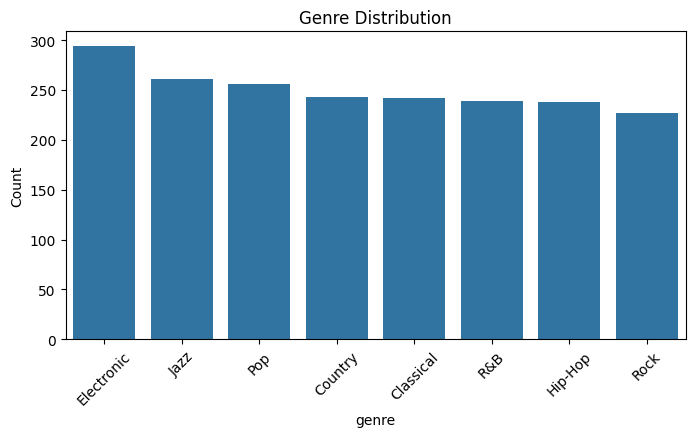

In [ ]:
# Data manipulation
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
genre_encoded = pd.get_dummies(spotify_data['genre'], prefix='genre')

# Concatenate with the main dataset
# Assign the concatenated DataFrame to 'data_cleaned'
data_cleaned = pd.concat([spotify_data, genre_encoded], axis=1)

# Visualize genre distribution
plt.figure(figsize=(8, 4))
# Use 'data_cleaned' now that it has been defined
sns.countplot(data=data_cleaned, x='genre', order=data_cleaned['genre'].value_counts().index)
plt.title("Genre Distribution")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**Frequency Encoding for artist and album**

In [ ]:
# Frequency encoding for 'artist' and 'album'
artist_counts = data_cleaned['artist'].value_counts()
album_counts = data_cleaned['album'].value_counts()

data_cleaned['artist_freq'] = data_cleaned['artist'].map(artist_counts)
data_cleaned['album_freq'] = data_cleaned['album'].map(album_counts)

# Visualize artist frequencies
plt.figure(figsize=(8, 4))
sns.histplot(data_cleaned['artist_freq'], bins=30, kde=True, color="blue")
plt.title("Distribution of Artist Frequency")
plt.xlabel("Frequency")
plt.show()


NameError: name 'data_cleaned' is not defined

# Numerical Feature Transformation
**a. Normalize or Standardize Numerical Features**

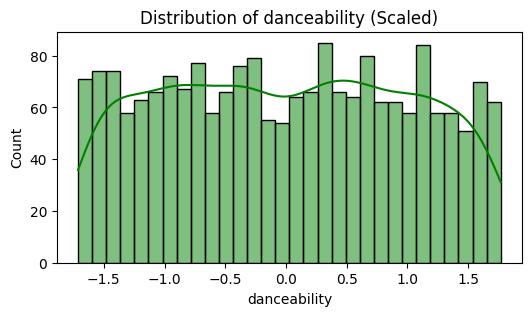

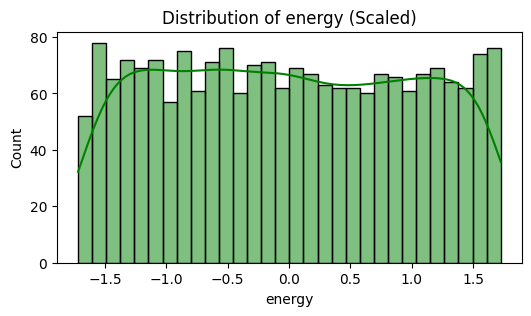

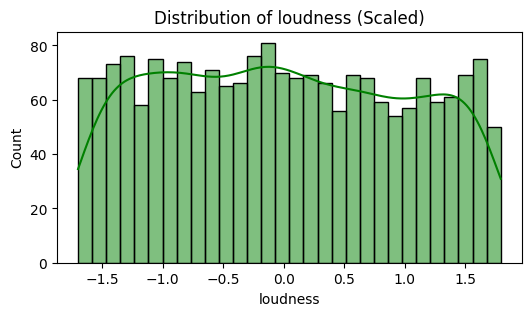

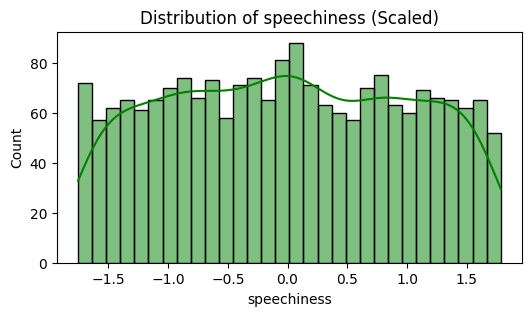

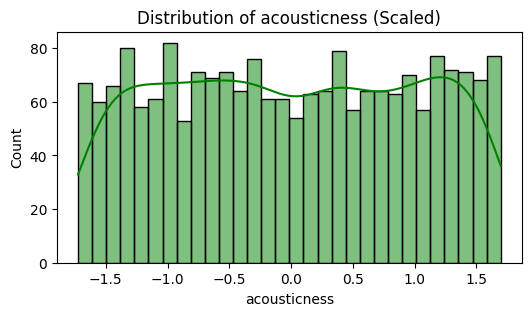

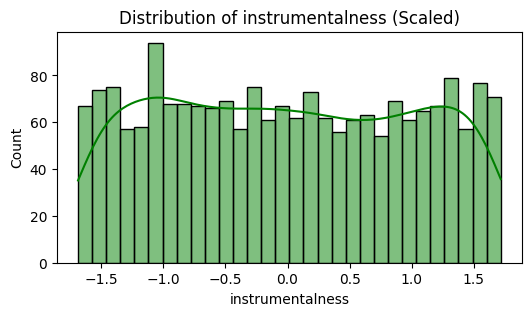

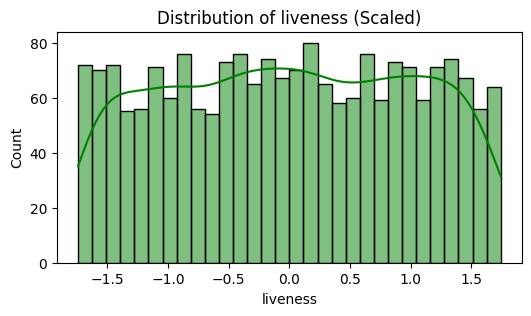

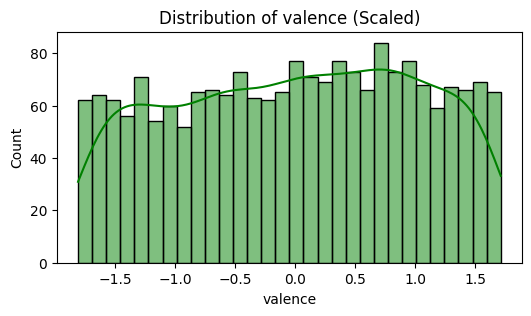

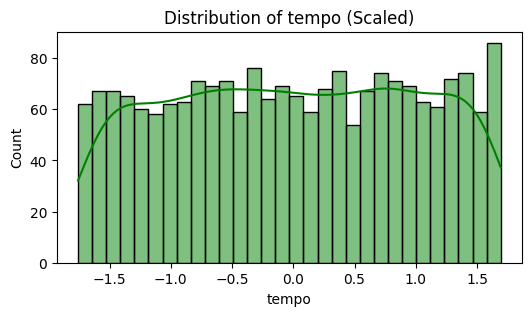

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select numerical columns
numerical_cols = ['danceability', 'energy', 'loudness', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Standardize numerical columns
scaler = StandardScaler()
data_cleaned[numerical_cols] = scaler.fit_transform(data_cleaned[numerical_cols])

# Visualize distributions before and after scaling
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(data_cleaned[col], bins=30, kde=True, color="green")
    plt.title(f"Distribution of {col} (Scaled)")
    plt.xlabel(col)
    plt.show()


**b. Handle outliers**

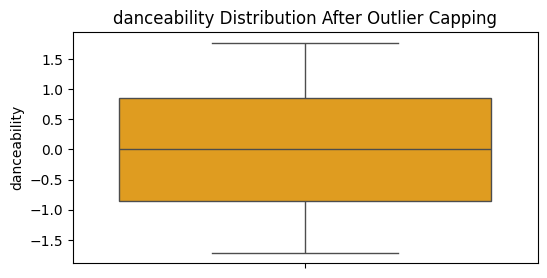

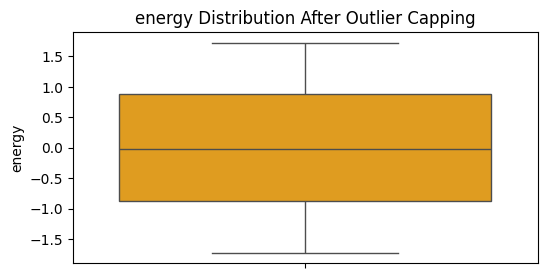

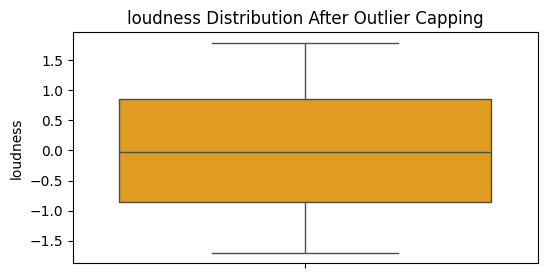

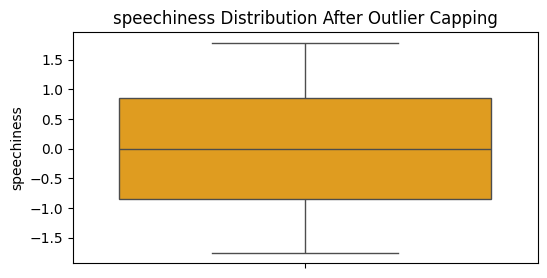

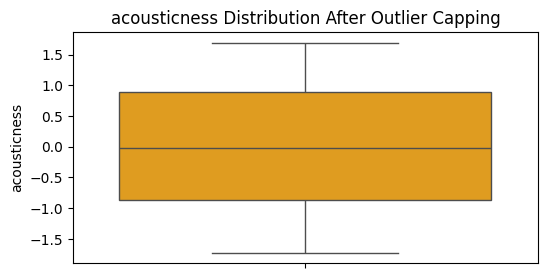

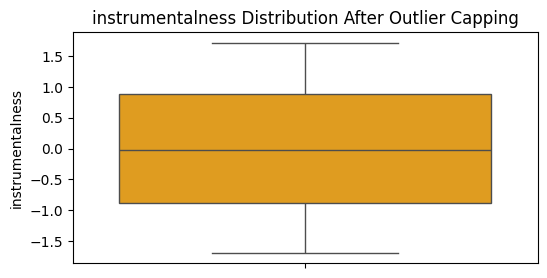

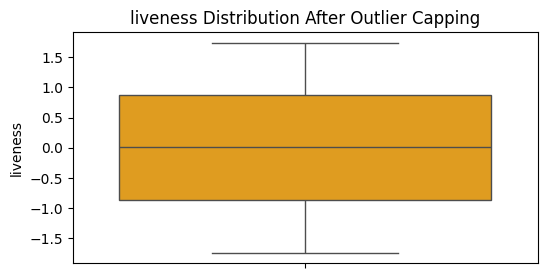

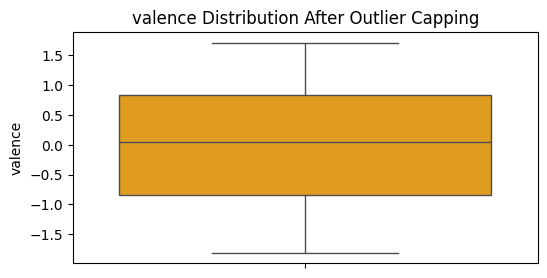

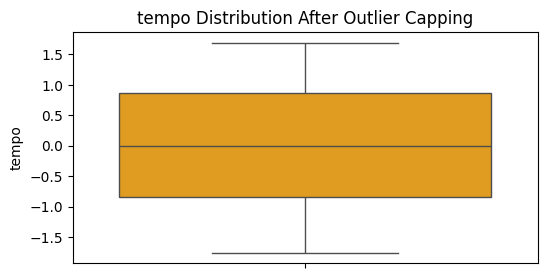

In [ ]:
# Handle outliers using the IQR method
Q1 = data_cleaned[numerical_cols].quantile(0.25)
Q3 = data_cleaned[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
outlier_low = Q1 - 1.5 * IQR
outlier_high = Q3 + 1.5 * IQR

# Cap outliers
for col in numerical_cols:
    data_cleaned[col] = data_cleaned[col].clip(lower=outlier_low[col], upper=outlier_high[col])

# Visualize the distribution after handling outliers
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data_cleaned[col], color="orange")
    plt.title(f"{col} Distribution After Outlier Capping")
    plt.show()


**Feature Creation**

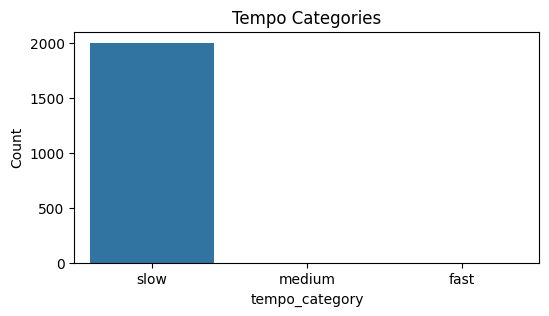

In [ ]:
# Categorize tempo
def categorize_tempo(tempo):
    if tempo < 90:
        return 'slow'
    elif tempo < 120:
        return 'medium'
    else:
        return 'fast'

data_cleaned['tempo_category'] = data_cleaned['tempo'].apply(categorize_tempo)

# Visualize tempo categories
plt.figure(figsize=(6, 3))
sns.countplot(data=data_cleaned, x='tempo_category', order=['slow', 'medium', 'fast'])
plt.title("Tempo Categories")
plt.ylabel("Count")
plt.show()


**b. Mood Indicator**

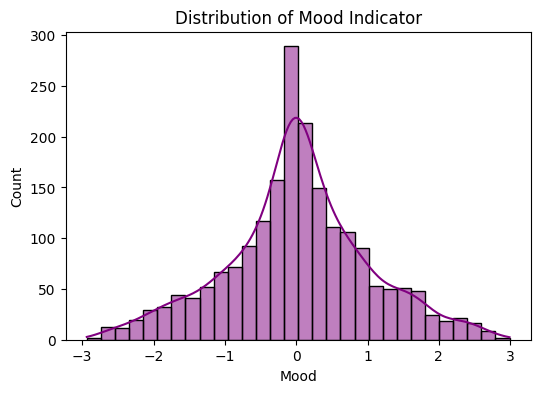

In [ ]:
# Create a 'mood' feature
data_cleaned['mood'] = data_cleaned['valence'] * data_cleaned['energy']

# Visualize mood distribution
plt.figure(figsize=(6, 4))
sns.histplot(data_cleaned['mood'], bins=30, kde=True, color="purple")
plt.title("Distribution of Mood Indicator")
plt.xlabel("Mood")
plt.show()


**c. Complexity Factor**

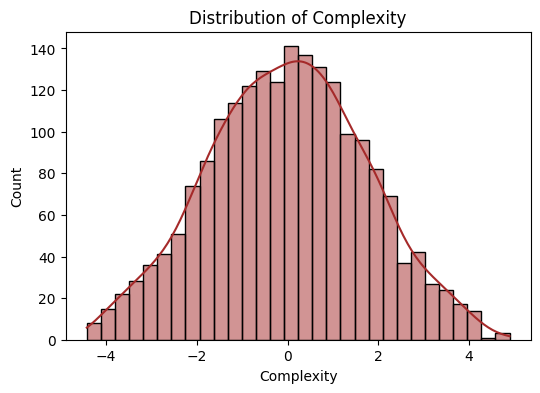

In [ ]:
# Combine acousticness, instrumentalness, and speechiness
data_cleaned['complexity'] = data_cleaned['acousticness'] + data_cleaned['instrumentalness'] + data_cleaned['speechiness']

# Visualize complexity distribution
plt.figure(figsize=(6, 4))
sns.histplot(data_cleaned['complexity'], bins=30, kde=True, color="brown")
plt.title("Distribution of Complexity")
plt.xlabel("Complexity")
plt.show()


**Data Reduction**

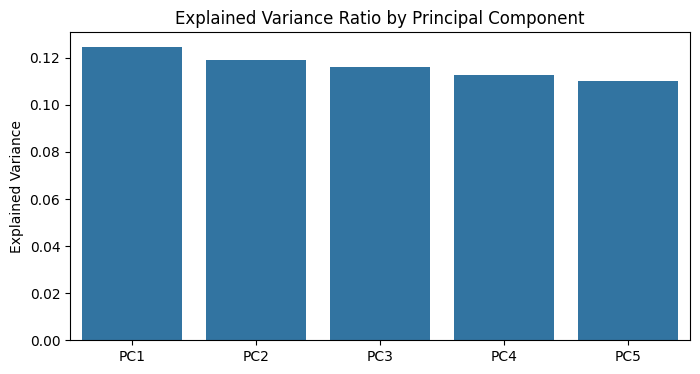

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to numerical features
pca = PCA(n_components=5)  # Reduce to 5 components
pca_features = pca.fit_transform(data_cleaned[numerical_cols])

# Add PCA components to the dataset
pca_df = pd.DataFrame(pca_features, columns=[f'pca_{i+1}' for i in range(5)])
data_cleaned = pd.concat([data_cleaned, pca_df], axis=1)

# Visualize explained variance
plt.figure(figsize=(8, 4))
sns.barplot(x=[f'PC{i+1}' for i in range(5)], y=pca.explained_variance_ratio_)
plt.title("Explained Variance Ratio by Principal Component")
plt.ylabel("Explained Variance")
plt.show()


**Prepare for Recommendations**

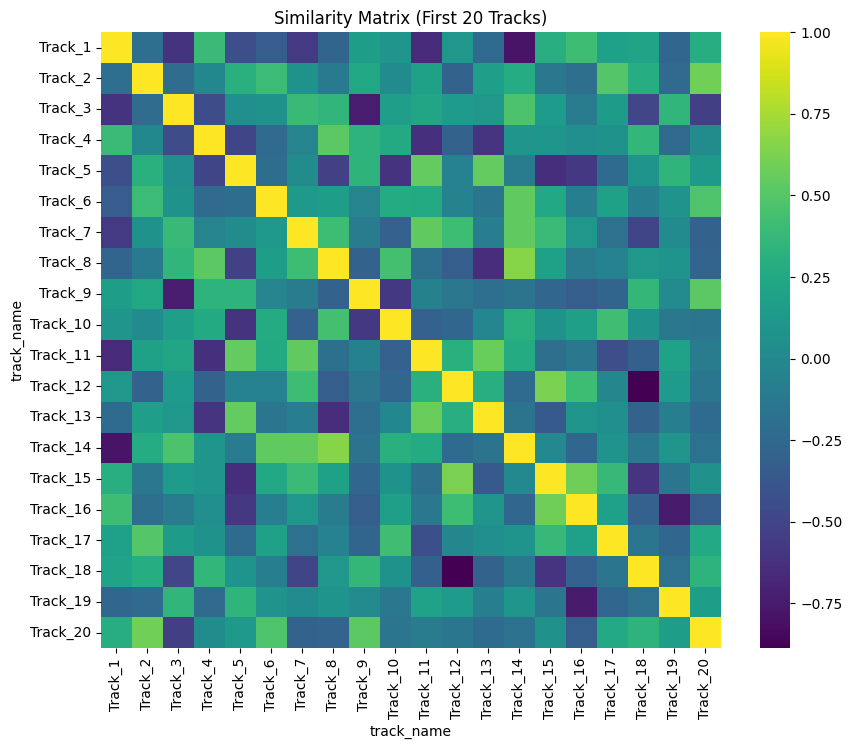

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate similarity based on numerical features
similarity_matrix = cosine_similarity(data_cleaned[numerical_cols])

# Convert to DataFrame
similarity_df = pd.DataFrame(similarity_matrix, index=data_cleaned['track_name'], columns=data_cleaned['track_name'])

# Visualize similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df.iloc[:20, :20], cmap='viridis')
plt.title("Similarity Matrix (First 20 Tracks)")
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Select relevant audio features for KNN
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(spotify_data[features])

# Ensure the data is in the right format
print(f"Shape of feature matrix: {data_scaled.shape}")


Shape of feature matrix: (2000, 9)


**Logistic regresssion**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score


# Encode the target variable
label_encoder = LabelEncoder()
spotify_data['genre_encoded'] = label_encoder.fit_transform(spotify_data['genre'])

# Select features and target
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = spotify_data[features]
y = spotify_data['genre_encoded']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scaling the data
    ('classifier', LogisticRegression(max_iter=10000))  # Step 2: Logistic Regression
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f'Accuracy: {accuracy:.2f}')
print("Classification Report:\n", report)


Accuracy: 0.13
Classification Report:
               precision    recall  f1-score   support

   Classical       0.17      0.12      0.14        73
     Country       0.08      0.05      0.06        73
  Electronic       0.12      0.28      0.17        88
     Hip-Hop       0.09      0.06      0.07        71
        Jazz       0.15      0.13      0.14        78
         Pop       0.23      0.14      0.18        77
         R&B       0.17      0.15      0.16        72
        Rock       0.06      0.06      0.06        68

    accuracy                           0.13       600
   macro avg       0.13      0.13      0.12       600
weighted avg       0.13      0.13      0.13       600



**Music Genre Classification Using Logistic Regression and Grid Search**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset

# Encode the target variable
label_encoder = LabelEncoder()
spotify_data['genre_encoded'] = label_encoder.fit_transform(spotify_data['genre'])

# Select features and target
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = spotify_data[features]
y = spotify_data['genre_encoded']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs'))
])

# Define hyperparameter grid
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__penalty': ['l2'],
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f'Best Model Accuracy: {accuracy:.2f}')
print("Classification Report:\n", report)


Best Model Accuracy: 0.12
Classification Report:
               precision    recall  f1-score   support

   Classical       0.14      0.08      0.10        48
     Country       0.08      0.06      0.07        49
  Electronic       0.11      0.25      0.15        59
     Hip-Hop       0.07      0.04      0.05        48
        Jazz       0.14      0.15      0.15        52
         Pop       0.29      0.18      0.22        51
         R&B       0.11      0.08      0.09        48
        Rock       0.04      0.04      0.04        45

    accuracy                           0.12       400
   macro avg       0.12      0.11      0.11       400
weighted avg       0.12      0.12      0.11       400



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


**"Music Genre Classification Using Random Forest with SMOTE and Grid Search"**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline

# Load the dataset

# Encode the target variable
label_encoder = LabelEncoder()
spotify_data['genre_encoded'] = label_encoder.fit_transform(spotify_data['genre'])

# Select features and target
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = spotify_data[features]
y = spotify_data['genre_encoded']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# Create a pipeline with Random Forest
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define hyperparameter grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f'Best Model Accuracy: {accuracy:.2f}')
print("Classification Report:\n", report)


Best Model Accuracy: 0.27
Classification Report:
               precision    recall  f1-score   support

   Classical       0.26      0.35      0.30        88
     Country       0.32      0.32      0.32        88
  Electronic       0.07      0.07      0.07        88
     Hip-Hop       0.29      0.33      0.31        89
        Jazz       0.27      0.25      0.26        88
         Pop       0.20      0.17      0.19        88
         R&B       0.28      0.27      0.28        89
        Rock       0.43      0.38      0.40        88

    accuracy                           0.27       706
   macro avg       0.27      0.27      0.26       706
weighted avg       0.27      0.27      0.26       706



**"Music Genre Classification Using XGBoost with Grid Search Optimization"**

In [ ]:
from xgboost import XGBClassifier

# Update the pipeline
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(eval_metric='mlogloss', use_label_encoder=False))
])

# Define hyperparameter grid for XGBoostw
param_grid_xgb = {
    'classifier__n_estimators': [100, 300, 500],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
}

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Evaluate the best model
best_model_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_model_xgb.predict(X_test)

# Model Evaluation
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_)

print(f'Best XGBoost Model Accuracy: {accuracy_xgb:.2f}')
print("Classification Report:\n", report_xgb)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:51:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGBoost Model Accuracy: 0.24
Classification Report:
               precision    recall  f1-score   support

   Classical       0.27      0.28      0.27        88
     Country       0.29      0.25      0.27        88
  Electronic       0.20      0.16      0.18        88
     Hip-Hop       0.26      0.24      0.25        89
        Jazz       0.19      0.16      0.17        88
         Pop       0.16      0.15      0.15        88
         R&B       0.20      0.28      0.24        89
        Rock       0.34      0.41      0.37        88

    accuracy                           0.24       706
   macro avg       0.24      0.24      0.24       706
weighted avg       0.24      0.24      0.24       706



linear regression code

**"Music Genre Prediction Using Polynomial Regression with Visualization"**

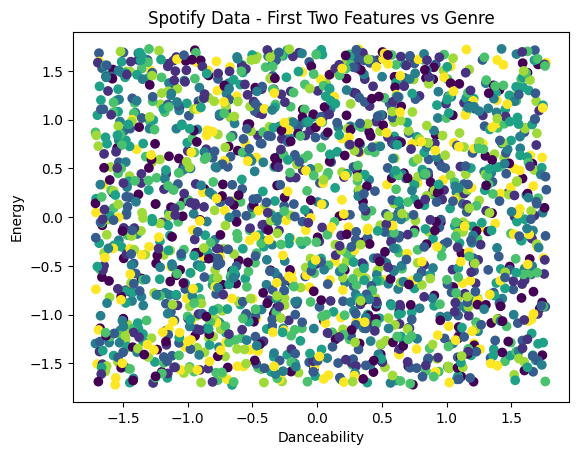

Mean Squared Error: 5.054835946971904


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


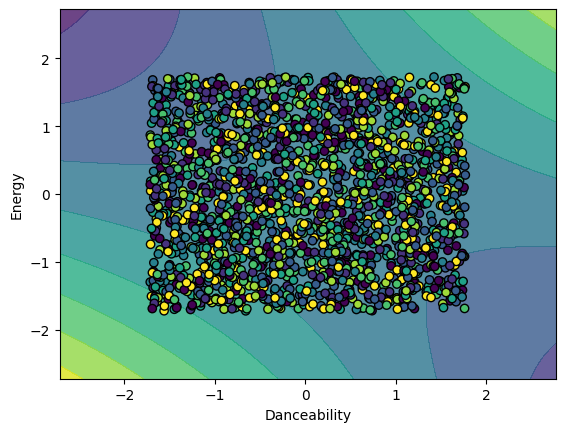

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder



# Access the columns using .iloc for integer-based indexing or .loc for label-based indexing
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis')  # Using .iloc for column indexing
plt.title('Spotify Data - First Two Features vs Genre')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()


# Step 3: Generate Polynomial Features (degree 2) to capture non-linear relationships
poly = PolynomialFeatures(degree=2)  # Using degree 2 for polynomial features
X_poly = poly.fit_transform(X)  # Apply polynomial transformation

# Step 5: Train the Linear Regression Model using the Polynomial Features
lin_reg = LinearRegression()
# Fit the model with the polynomial features instead of the original features
lin_reg.fit(X_poly, y)

# Step 6: Make Predictions
X_test_poly = poly.transform(X_test)
y_pred = lin_reg.predict(X_test_poly)

# Step 7: Evaluate the Model (using Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
# Step 8: Visualize the Polynomial Regression Results (for the first two features)
# Create a grid of X values for smooth curve plotting, using the first two features
num_points = 100  # Number of points in the grid
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1  # Use .iloc to access column 0
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1  # Use .iloc to access column 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, num_points),
                     np.linspace(y_min, y_max, num_points))

# Create the feature grid for prediction
X_grid = np.c_[xx.ravel(), yy.ravel()]  # Combine the two feature grids
# Add the remaining features (set to their mean for simplicity)
for i in range(2, X.shape[1]):
    # Use .iloc to access columns by integer position
    X_grid = np.c_[X_grid, np.full(X_grid.shape[0], X.iloc[:, i].mean())]

# Apply polynomial transformation to the grid
X_grid_poly = poly.transform(X_grid)

# Predict using the model
y_grid_pred = lin_reg.predict(X_grid_poly)

# Reshape the predictions for plotting
y_grid_pred = y_grid_pred.reshape(xx.shape)

# Visualize the results for first two features
plt.contourf(xx, yy, y_grid_pred, cmap='viridis', alpha=0.8)  # Plot the decision boundary
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis', edgecolors='k')  # Plot the original data points
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

**"Music Genre Prediction Using Linear Regression with Feature Visualization"**

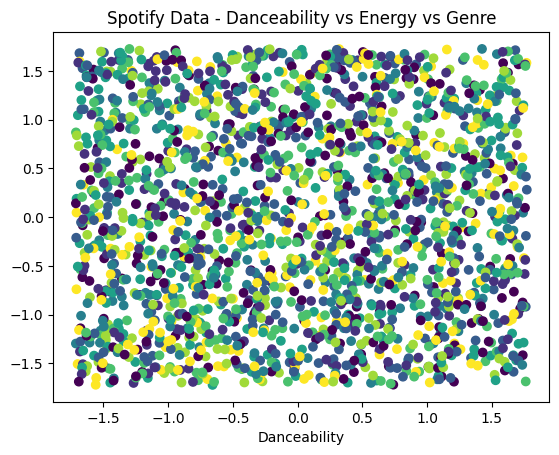

Mean Squared Error (Linear Regression): 5.166253020190158


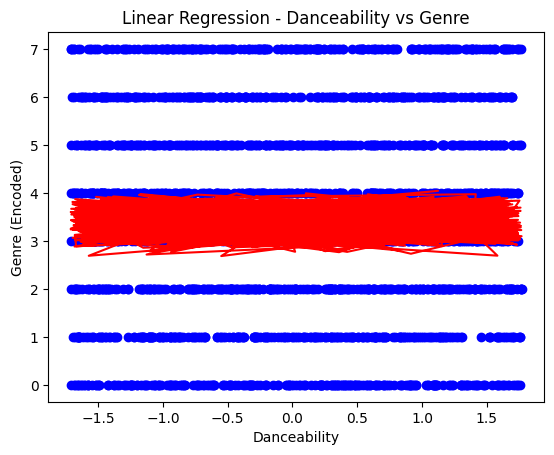

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder



# Step 2: Visualize the original data (Using only the first two features for visualization purposes)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis')  # Using .iloc for column indexing by position
plt.title('Spotify Data - Danceability vs Energy vs Genre')
plt.xlabel('Danceability')
plt.show()

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = lin_reg.predict(X_test)

# Step 6: Evaluate the Model (using Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (Linear Regression): {mse}')

# Step 7: Visualize the Linear Regression Results
# Visualizing using only the first two features (for simplicity)
plt.scatter(X.iloc[:, 0], y, color='blue')  # Using .iloc for column indexing by position
plt.plot(X.iloc[:, 0], lin_reg.predict(X), color='red')  # Using .iloc for column indexing by position
plt.title('Linear Regression - Danceability vs Genre')
plt.xlabel('Danceability')
plt.ylabel('Genre (Encoded)')
plt.show()

# Main: Build KNN Model for Content-Based Recommendations**
**a. Train KNN Model**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80%-20% split)
train_data, test_data = train_test_split(spotify_data, test_size=0.2, random_state=42)

print(f"Training set size: {len(train_data)}, Testing set size: {len(test_data)}")


Training set size: 1600, Testing set size: 400


In [ ]:
train_features_scaled = scaler.fit_transform(train_data[features])
test_features_scaled = scaler.transform(test_data[features])

print("First 5 scaled train features:\n", train_features_scaled[:5])
print("First 5 scaled test features:\n", test_features_scaled[:5])


First 5 scaled train features:
 [[-0.91539336  1.16727012 -0.40447821 -0.61793082  0.63143678 -0.29578393
  -1.72211428  0.15901345  1.34689127]
 [ 0.27690014 -1.54714676 -0.3027269  -1.26130381  1.0862882   1.00635488
   0.47101373  1.59635996  0.79556858]
 [ 0.36719992 -0.54170514  0.51835196 -1.08028016 -0.88156784 -0.8581121
   0.4528271  -0.67459035  0.81703141]
 [ 0.74167889  0.75678252 -0.70127739 -0.01528708 -1.0678979   0.78096279
  -1.19635434 -0.03612342  1.69246123]
 [ 1.03630359  0.08277865 -1.48402388 -0.78563676 -0.86533214  1.08660719
  -1.01109124  0.63636     0.61766354]]
First 5 scaled test features:
 [[ 0.63053069  1.24528113 -0.47130828 -0.91900147 -0.97661151  0.386265
   0.74761706  1.52846062  0.34908854]
 [-1.52781835 -1.19134498 -1.51317512  0.46015373 -0.30250795  0.33737809
   1.10233008  1.58649237 -0.23776435]
 [ 1.55538156 -0.05455115  1.18062462  0.62519812 -1.32713844  1.44267121
  -1.02532244  0.06144323  0.07786938]
 [ 0.7022057  -0.38756231 -0.280950

In [ ]:
from sklearn.neighbors import NearestNeighbors
# Train a KNN model
knn = NearestNeighbors(n_neighbors=10, metric='cosine')
knn.fit(data_scaled)
print("KNN model trained on audio features.")


NameError: name 'data_scaled' is not defined

In [ ]:
# Assuming 'features' is a list or a dataframe containing the selected features for both training and test data.

# Ensure that the 'features' used in training are the same as the ones used for testing
train_features = train_data[features]  # Extract the selected features from the training data
test_features = test_data[features]    # Extract the selected features from the test data

# Fit the StandardScaler on the training data
scaler = StandardScaler()
scaler.fit(train_features)  # Use the training data to fit the scaler

for i in range(5):  # Check for the first 5 test tracks
    test_track = test_data.iloc[i]
    ground_truth = test_data[test_data['genre'] == test_track['genre']]['track_name'].tolist()

    # Recommendations
    test_scaled_sample = test_features.iloc[i:i+1]  # Ensure the row is passed as a DataFrame

    # Scale the sample with the same feature names
    test_scaled_sample = scaler.transform(test_scaled_sample)  # Ensure this uses the DataFrame structure

    distances, indices = knn.kneighbors(test_scaled_sample, n_neighbors=6)

    # Ensure indices are within the bounds of train_data
    valid_indices = indices.flatten()[1:][indices.flatten()[1:] < len(train_data)]

    recommended_tracks = train_data.iloc[valid_indices]['track_name'].tolist()

    print(f"Test Track: {test_track['track_name']}")
    print(f"Ground Truth: {ground_truth}")
    print(f"Recommendations: {recommended_tracks}\n")


Test Track: Track_1861
Ground Truth: ['Track_1861', 'Track_1274', 'Track_57', 'Track_129', 'Track_1647', 'Track_1665', 'Track_100', 'Track_793', 'Track_1081', 'Track_1610', 'Track_586', 'Track_910', 'Track_1742', 'Track_1848', 'Track_325', 'Track_1820', 'Track_1484', 'Track_1556', 'Track_1885', 'Track_1042', 'Track_1037', 'Track_1108', 'Track_1894', 'Track_307', 'Track_1667', 'Track_234', 'Track_1698', 'Track_308', 'Track_110', 'Track_1465', 'Track_1199', 'Track_1226', 'Track_603', 'Track_271', 'Track_856', 'Track_694', 'Track_527', 'Track_290', 'Track_189', 'Track_580', 'Track_1935', 'Track_1785', 'Track_116', 'Track_480', 'Track_1076', 'Track_571', 'Track_1563', 'Track_352', 'Track_1054', 'Track_1967', 'Track_496', 'Track_1966', 'Track_1466', 'Track_1302', 'Track_46', 'Track_428', 'Track_781', 'Track_1619', 'Track_544', 'Track_1601', 'Track_1511', 'Track_176', 'Track_1413', 'Track_1611', 'Track_1746', 'Track_638', 'Track_1714', 'Track_323', 'Track_1564', 'Track_1461', 'Track_731', 'T

In [ ]:
knn = NearestNeighbors(n_neighbors=10, metric='cosine', algorithm='auto')

knn.fit(train_features_scaled)


NearestNeighbors(metric='cosine', n_neighbors=10)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Use test_features_scaled instead of test_scaled
test_sample_features = test_features_scaled[0].reshape(1, -1)  # Change here
ground_truth = []
for i, train_track_features in enumerate(train_features_scaled):
    similarity = cosine_similarity(test_sample_features, train_track_features.reshape(1, -1))
    if similarity >= 0.8:  # Adjust threshold
        ground_truth.append(train_data.iloc[i]['track_name'])

print(f"Feature-based Ground Truth: {ground_truth}")

Feature-based Ground Truth: ['Track_251', 'Track_784', 'Track_824', 'Track_91', 'Track_1880']


# StandardScaler with Fixed Threshold:
**Simplified recommendation system with fixed similarity threshold and Standard scaling.**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

def evaluate_with_accuracy(test_data, train_data, knn_model, features, n_recommendations=5):
    # Scale the test data features
    scaler = StandardScaler()
    train_features_scaled = scaler.fit_transform(train_data[features])
    test_scaled = scaler.transform(test_data[features])

    y_true = []  # Ground truth
    y_pred = []  # Model predictions

    for i in range(len(test_data)):
        test_track = test_data.iloc[i]
        test_track_features = test_scaled[i].reshape(1, -1)

        # Feature-based ground truth (or genre if strict ground truth is preferred)
        ground_truth = []
        for j, train_track_features in enumerate(train_features_scaled):
            similarity = cosine_similarity(test_track_features, train_track_features.reshape(1, -1))
            if similarity >= 0.8:  # Adjust threshold as needed
                ground_truth.append(train_data.iloc[j]['track_name'])

        # Recommendations
        distances, indices = knn_model.kneighbors(test_track_features, n_neighbors=n_recommendations + 1)
        recommended_tracks = train_data.iloc[indices.flatten()[1:]]['track_name'].tolist()

        # Binary arrays for accuracy calculation
        y_true_sample = [1 if track in ground_truth else 0 for track in recommended_tracks]
        y_pred_sample = [1] * len(recommended_tracks)  # Model always recommends these

        y_true.extend(y_true_sample)
        y_pred.extend(y_pred_sample)

    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Classification Report with zero_division parameter
    class_report = classification_report(y_true, y_pred, target_names=["Not Recommended", "Recommended"], zero_division=0)

    return accuracy, class_report, y_true, y_pred

# Call the function
accuracy, class_report, y_true, y_pred = evaluate_with_accuracy(test_data, train_data, knn, features, n_recommendations=5)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)


Accuracy: 0.7735
Classification Report:
                 precision    recall  f1-score   support

Not Recommended       0.00      0.00      0.00       453
    Recommended       0.77      1.00      0.87      1547

       accuracy                           0.77      2000
      macro avg       0.39      0.50      0.44      2000
   weighted avg       0.60      0.77      0.67      2000



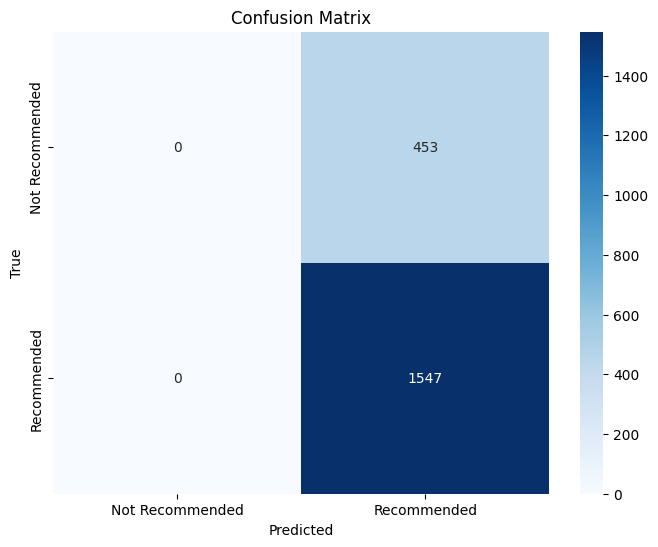

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Now you can use y_true and y_pred
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Recommended", "Recommended"], yticklabels=["Not Recommended", "Recommended"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



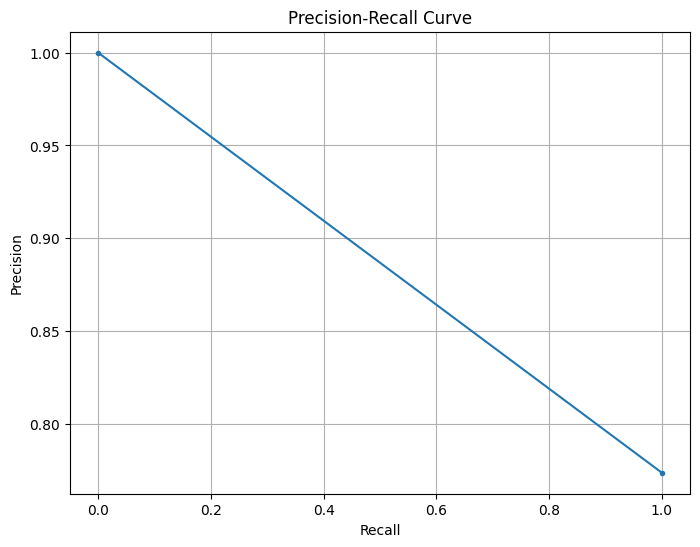

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_true, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()


In [ ]:
def recommend_tracks(track_name, data, knn_model, features, n_recommendations=5):
    """
    Recommend tracks similar to the given track.
    """
    # Find the index of the track
    track_idx = data.index[data['track_name'] == track_name].tolist()

    if not track_idx:
        return f"Track '{track_name}' not found in the dataset."

    track_idx = track_idx[0]
    distances, indices = knn_model.kneighbors([data_scaled[track_idx]], n_neighbors=n_recommendations + 1)

    # Retrieve recommended tracks
    recommendations = []
    for idx, distance in zip(indices.flatten(), distances.flatten()):
        if idx != track_idx:  # Skip the input track
            recommendations.append({
                'track_name': data.iloc[idx]['track_name'],
                'artist': data.iloc[idx]['artist'],
                'distance': distance
            })

    return recommendations


enter the track name for the recommendations:Track_12
Recommendations for 'Track_12':
    track_name     artist  distance
0   Track_1001  Artist_34  0.000089
1    Track_998  Artist_18  0.109331
2   Track_1119  Artist_60  0.144061
3   Track_1584   Artist_7  0.149266
4    Track_236  Artist_90  0.178495
5    Track_224   Artist_2  0.185737
6   Track_1430  Artist_24  0.192537
7   Track_1126  Artist_30  0.215394
8    Track_933  Artist_12  0.219164
9    Track_980  Artist_64  0.231341
10  Track_1547  Artist_57  0.235212


<ipython-input-97-df2b2f9614b9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recommendations_df['track_name'], y=recommendations_df['distance'], palette='viridis')


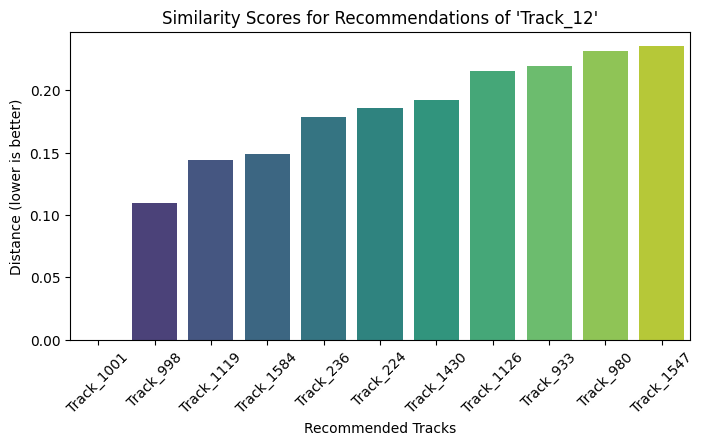

In [ ]:
# Test the recommendation system
track_name = input("enter the track name for the recommendations:")  # Replace with a valid track name from your dataset
recommendations = recommend_tracks(track_name, spotify_data, knn, features, n_recommendations=10)

# Display recommendations as a table
recommendations_df = pd.DataFrame(recommendations)
print(f"Recommendations for '{track_name}':")
print(recommendations_df)

# Visualize recommendation distances
plt.figure(figsize=(8, 4))
sns.barplot(x=recommendations_df['track_name'], y=recommendations_df['distance'], palette='viridis')
plt.title(f"Similarity Scores for Recommendations of '{track_name}'")
plt.ylabel("Distance (lower is better)")
plt.xlabel("Recommended Tracks")
plt.xticks(rotation=45)
plt.show()


**recommendation on Artist Name**

Enter the artist name for recommendations: Artist_23
Recommendations based on artist 'Artist_23':
    track_name     artist  distance
0    Track_731  Artist_20  0.000060
1   Track_1501  Artist_59  0.088975
2   Track_1256  Artist_54  0.147597
3    Track_900  Artist_75  0.175122
4    Track_726  Artist_85  0.179754
5    Track_926  Artist_42  0.201002
6   Track_1356  Artist_83  0.214813
7    Track_593  Artist_99  0.227477
8    Track_314  Artist_89  0.243332
9    Track_279  Artist_89  0.247774
10   Track_545  Artist_91  0.249585


<ipython-input-98-e7d9d5d113da>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recommendations_df['track_name'], y=recommendations_df['distance'], palette='viridis')


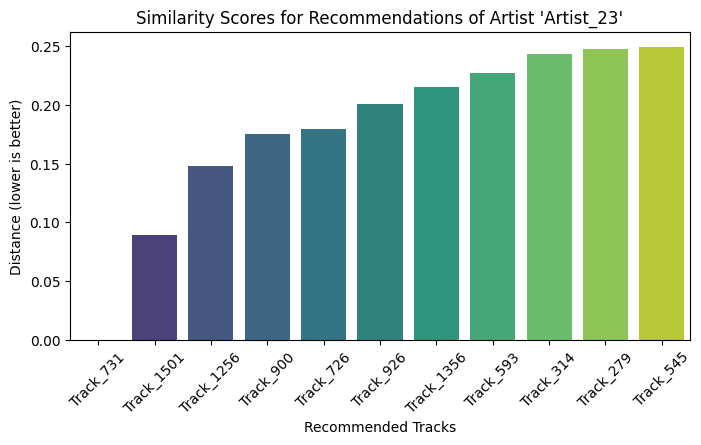

In [ ]:
def recommend_by_artist(artist_name, data, knn_model, features, n_recommendations=5):
    """
    Recommend tracks based on a given artist name.
    """
    # Find indices of tracks by the specified artist
    artist_tracks_idx = data.index[data['artist'].str.lower() == artist_name.lower()].tolist()

    if not artist_tracks_idx:
        return f"Artist '{artist_name}' not found in the dataset."

    # Use the first track by the artist as reference
    track_idx = artist_tracks_idx[0]
    distances, indices = knn_model.kneighbors([data_scaled[track_idx]], n_neighbors=n_recommendations + 1)

    # Retrieve recommended tracks
    recommendations = []
    for idx, distance in zip(indices.flatten(), distances.flatten()):
        if idx != track_idx:  # Skip the input track
            recommendations.append({
                'track_name': data.iloc[idx]['track_name'],
                'artist': data.iloc[idx]['artist'],
                'distance': distance
            })

    return recommendations

# Test the recommendation system
artist_name = input("Enter the artist name for recommendations: ")
recommendations = recommend_by_artist(artist_name, spotify_data, knn, features, n_recommendations=10)

# Display recommendations as a table
if isinstance(recommendations, str):
    print(recommendations)
else:
    recommendations_df = pd.DataFrame(recommendations)
    print(f"Recommendations based on artist '{artist_name}':")
    print(recommendations_df)

    # Visualize recommendation distances
    plt.figure(figsize=(8, 4))
    sns.barplot(x=recommendations_df['track_name'], y=recommendations_df['distance'], palette='viridis')
    plt.title(f"Similarity Scores for Recommendations of Artist '{artist_name}'")
    plt.ylabel("Distance (lower is better)")
    plt.xlabel("Recommended Tracks")
    plt.xticks(rotation=45)
    plt.show()


**Recommendations by genre**

Enter the genre name for recommendations: Hip-Hop
Recommendations based on genre 'Hip-Hop':
    track_name     artist  distance
0    Track_778  Artist_35  0.000051
1     Track_31  Artist_91  0.100454
2    Track_708  Artist_77  0.112728
3    Track_281  Artist_23  0.137647
4    Track_823  Artist_83  0.140926
5    Track_909   Artist_4  0.159385
6   Track_1130   Artist_5  0.183738
7   Track_1461  Artist_34  0.198625
8    Track_461   Artist_6  0.200127
9    Track_847  Artist_65  0.203111
10   Track_821  Artist_74  0.235068


<ipython-input-99-e1330ff81ddb>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recommendations_df['track_name'], y=recommendations_df['distance'], palette='viridis')


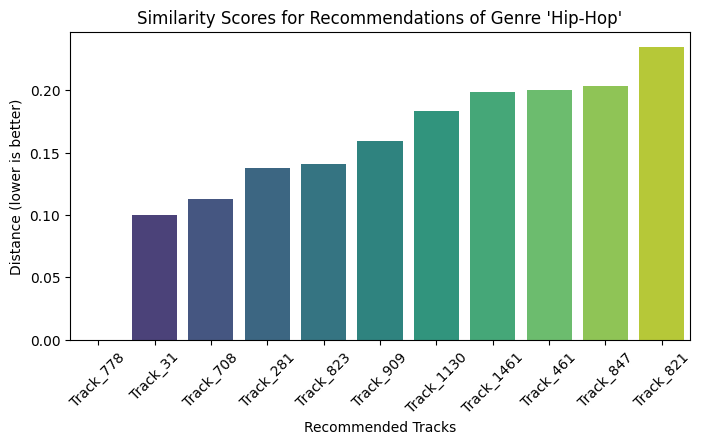

In [ ]:
def recommend_by_genre(genre_name, data, knn_model, features, n_recommendations=5):
    """
    Recommend tracks based on a given genre.
    """
    # Find indices of tracks by the specified genre
    genre_tracks_idx = data.index[data['genre'].str.lower() == genre_name.lower()].tolist()

    if not genre_tracks_idx:
        return f"Genre '{genre_name}' not found in the dataset."

    # Use the first track of the genre as reference
    track_idx = genre_tracks_idx[0]
    distances, indices = knn_model.kneighbors([data_scaled[track_idx]], n_neighbors=n_recommendations + 1)

    # Retrieve recommended tracks
    recommendations = []
    for idx, distance in zip(indices.flatten(), distances.flatten()):
        if idx != track_idx:  # Skip the input track
            recommendations.append({
                'track_name': data.iloc[idx]['track_name'],
                'artist': data.iloc[idx]['artist'],
                'distance': distance
            })

    return recommendations

# Test the recommendation system
genre_name = input("Enter the genre name for recommendations: ")
recommendations = recommend_by_genre(genre_name, spotify_data, knn, features, n_recommendations=10)

# Display recommendations as a table
if isinstance(recommendations, str):
    print(recommendations)
else:
    recommendations_df = pd.DataFrame(recommendations)
    print(f"Recommendations based on genre '{genre_name}':")
    print(recommendations_df)

    # Visualize recommendation distances
    plt.figure(figsize=(8, 4))
    sns.barplot(x=recommendations_df['track_name'], y=recommendations_df['distance'], palette='viridis')
    plt.title(f"Similarity Scores for Recommendations of Genre '{genre_name}'")
    plt.ylabel("Distance (lower is better)")
    plt.xlabel("Recommended Tracks")
    plt.xticks(rotation=45)
    plt.show()


**Recommendations on both genre and Artist**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-102-fddffc1cf834>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_tracks['distance'] = distances[0][1:]
<ipython-input-102-fddffc1cf834>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='track_name', y='distance', data=recommendations, palette='viridis')


Recommendations for tracks by 'Artist_17' in the genre 'Pop':
      track_name     artist      genre  distance
891    Track_892  Artist_88    Country  0.156582
1078  Track_1079   Artist_6    Hip-Hop  0.203607
244    Track_245  Artist_38        R&B  0.205721
1224  Track_1225  Artist_12        R&B  0.221883
1230  Track_1231  Artist_97    Hip-Hop  0.226779
288    Track_289  Artist_60       Jazz  0.233769
59      Track_60  Artist_84       Rock  0.241827
1420  Track_1421  Artist_37    Hip-Hop  0.247870
1325  Track_1326  Artist_62  Classical  0.256772


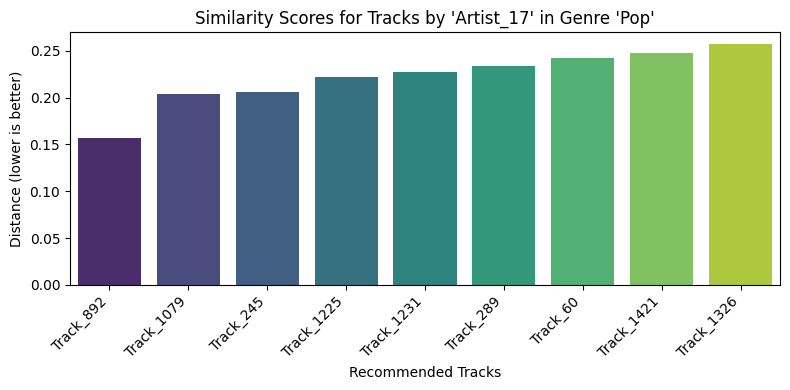

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# Recommendation function based on genre and artist
def recommend_tracks_by_genre_and_artist(genre_name, artist_name, spotify_data, model, features, n_recommendations=20):
    # Filter tracks by the given genre and artist
    filtered_tracks = spotify_data[(spotify_data['artist'] == artist_name) & (spotify_data['genre'] == genre_name)]

    if filtered_tracks.empty:
        print(f"No tracks found for artist: '{artist_name}' and genre: '{genre_name}'")
        return pd.DataFrame()

    # Select a representative track (first track)
    representative_track = filtered_tracks.iloc[0]

    track_features = representative_track[features].values.reshape(1, -1)
    track_features_scaled = scaler.transform(track_features)

    # Find similar tracks using the k-NN model
    distances, indices = model.kneighbors(track_features_scaled, n_neighbors=n_recommendations)

    # Gather recommended tracks (excluding the first one, which is the query track itself)
    recommended_tracks = spotify_data.iloc[indices[0][1:]]
    recommended_tracks['distance'] = distances[0][1:]

    # Return the recommended tracks with their similarity scores
    recommendations = recommended_tracks[['track_name', 'artist', 'genre', 'distance']]
    return recommendations

# Example artist and genre
artist_name = "Artist_17"  # Replace with an actual artist name in your dataset
genre_name = "Pop"         # Replace with an actual genre in your dataset

# Get recommendations
# Assuming 'knn' is the trained NearestNeighbors model and 'features' are the same as used for training
recommendations = recommend_tracks_by_genre_and_artist(genre_name, artist_name, spotify_data, knn, features, n_recommendations=10)

# Display recommendations as a table
if not recommendations.empty:
    print(f"Recommendations for tracks by '{artist_name}' in the genre '{genre_name}':")
    print(recommendations)

    # Visualize recommendation distances
    plt.figure(figsize=(8, 4))
    sns.barplot(x='track_name', y='distance', data=recommendations, palette='viridis')
    plt.title(f"Similarity Scores for Tracks by '{artist_name}' in Genre '{genre_name}'")
    plt.ylabel("Distance (lower is better)")
    plt.xlabel("Recommended Tracks")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# MinMaxScaler with Dynamic Threshold:
**Flexible recommendation system with dynamic similarity threshold and MinMax scaling.**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cosine

def evaluate_with_accuracy_modified(test_data, train_data, knn_model, features, n_recommendations=5):
    # Scale features
    scaler = MinMaxScaler()
    train_features_scaled = scaler.fit_transform(train_data[features])
    test_scaled = scaler.transform(test_data[features])

    y_true = []  # Ground truth
    y_pred = []  # Model predictions

    for i in range(len(test_data)):
        test_track = test_data.iloc[i]
        test_track_features = test_scaled[i].reshape(1, -1)

        # Improved Ground Truth (Dynamic Similarity Threshold)
        ground_truth = []
        for j, train_track_features in enumerate(train_features_scaled):
            similarity = 1 - cosine(test_track_features.flatten(), train_track_features.flatten())
            dynamic_threshold = 0.8  # Adjust based on observations
            if similarity >= dynamic_threshold:
                ground_truth.append(train_data.iloc[j]['track_name'])

        # Recommendations with weighted voting
        distances, indices = knn_model.kneighbors(test_track_features, n_neighbors=n_recommendations + 1)
        recommended_tracks = train_data.iloc[indices.flatten()[1:]]['track_name'].tolist()

        # Binary labels for evaluation
        y_true_sample = [1 if track in ground_truth else 0 for track in recommended_tracks]
        y_pred_sample = [1] * len(recommended_tracks)

        y_true.extend(y_true_sample)
        y_pred.extend(y_pred_sample)

    # Calculate Metrics
    accuracy = accuracy_score(y_true, y_pred)
    class_report = classification_report(y_true, y_pred, target_names=["Not Recommended", "Recommended"], zero_division=0)

    return accuracy, class_report, y_true, y_pred

# Train a k-NN model with optimized parameters
knn_model = NearestNeighbors(n_neighbors=7, metric="cosine", algorithm="brute")
train_features_scaled = scaler.fit_transform(train_data[features])
knn_model.fit(train_features_scaled)

# Call the improved function
accuracy, class_report, y_true, y_pred = evaluate_with_accuracy_modified(test_data, train_data, knn_model, features, n_recommendations=7)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)


Accuracy: 0.9914285714285714
Classification Report:
                 precision    recall  f1-score   support

Not Recommended       0.00      0.00      0.00        24
    Recommended       0.99      1.00      1.00      2776

       accuracy                           0.99      2800
      macro avg       0.50      0.50      0.50      2800
   weighted avg       0.98      0.99      0.99      2800



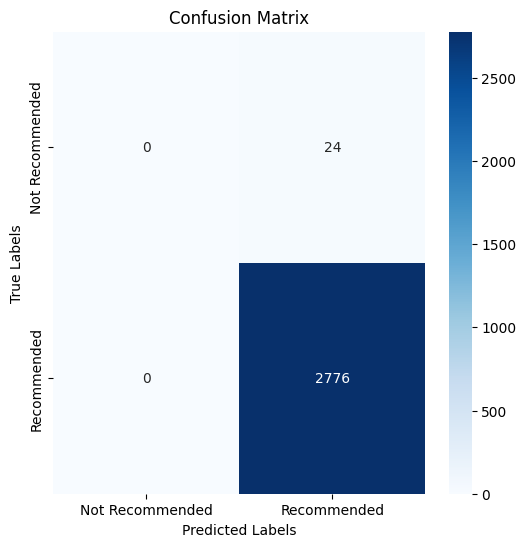

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_true and y_pred are already defined
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Recommended", "Recommended"], yticklabels=["Not Recommended", "Recommended"])
plt.title("Confusion Matrix")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.show()


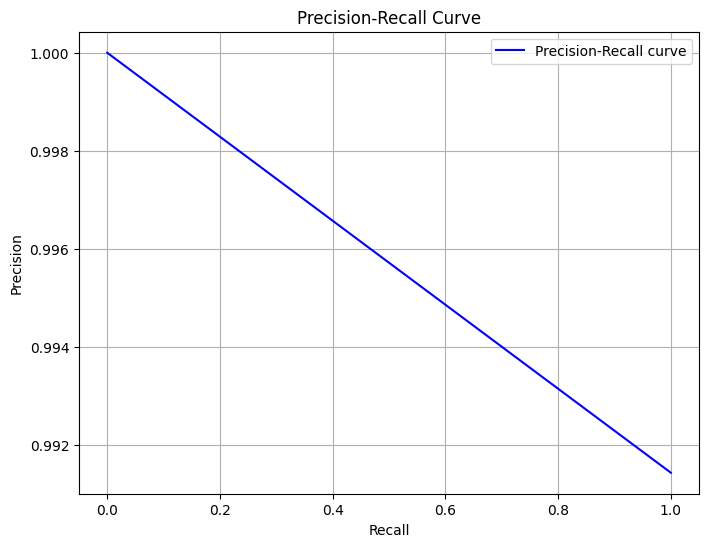

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming y_true and y_pred are binary (0 or 1)
# If y_pred is the probability, make sure to use the predicted probabilities for the positive class

# Compute precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()


enter track name to get recommendationsTrack_123
Recommendations for 'Track_123':
Track: Track_1314, Artist: Artist_63, Distance: 0.0000
Track: Track_194, Artist: Artist_27, Distance: 0.1770
Track: Track_880, Artist: Artist_30, Distance: 0.1984
Track: Track_257, Artist: Artist_80, Distance: 0.2124
Track: Track_441, Artist: Artist_58, Distance: 0.2189
Track: Track_1069, Artist: Artist_90, Distance: 0.2386
Track: Track_1561, Artist: Artist_70, Distance: 0.2397
Track: Track_106, Artist: Artist_15, Distance: 0.2497
Track: Track_469, Artist: Artist_16, Distance: 0.2558
Track: Track_983, Artist: Artist_74, Distance: 0.2585
Track: Track_1462, Artist: Artist_17, Distance: 0.2642


<ipython-input-108-088bee922c48>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recommendations_df['track_name'], y=recommendations_df['distance'], palette='viridis')


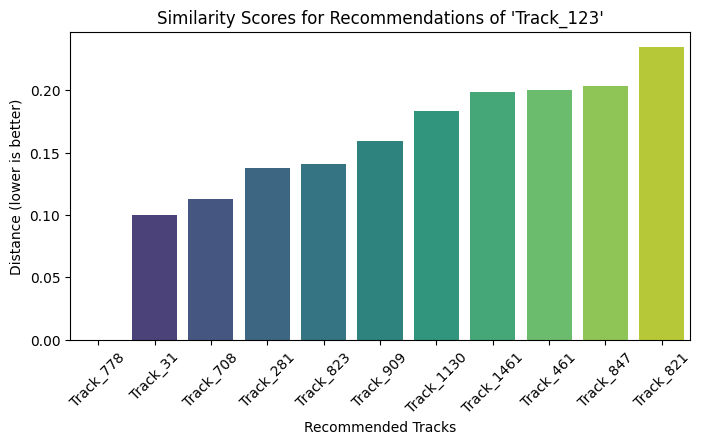

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def recommend_tracks(track_name, data, knn_model, features, data_scaled, n_recommendations=5):


    # Find the index of the track
    track_idx = data.index[data['track_name'] == track_name].tolist()

    if not track_idx:
        return f"Track '{track_name}' not found in the dataset."

    track_idx = track_idx[0]

    # Find nearest neighbors for the given track (excluding the track itself)
    distances, indices = knn_model.kneighbors([data_scaled[track_idx]], n_neighbors=n_recommendations + 1)

    # Retrieve recommended tracks
    recommendations = []
    for idx, distance in zip(indices.flatten(), distances.flatten()):
        if idx != track_idx:  # Skip the input track itself
            recommendations.append({
                'track_name': data.iloc[idx]['track_name'],
                'artist': data.iloc[idx]['artist'],
                'distance': distance
            })

    return recommendations

# Example usage:
# Assuming 'data' is your dataset and 'knn_model' is a pre-trained k-NN model
# 'data_scaled' is the scaled version of 'data' for model compatibility
track_name = input("enter track name to get recommendations")  # Replace with the track you want to base recommendations on
n_recommendations = 10

recommendations = recommend_tracks(track_name, spotify_data, knn_model, features, data_scaled, n_recommendations)

# Display recommendations
if isinstance(recommendations, list):
    print(f"Recommendations for '{track_name}':")
    for rec in recommendations:
        print(f"Track: {rec['track_name']}, Artist: {rec['artist']}, Distance: {rec['distance']:.4f}")
else:
    print(recommendations)

#Visualize recommendation distances
plt.figure(figsize=(8, 4))
sns.barplot(x=recommendations_df['track_name'], y=recommendations_df['distance'], palette='viridis')
plt.title(f"Similarity Scores for Recommendations of '{track_name}'")
plt.ylabel("Distance (lower is better)")
plt.xlabel("Recommended Tracks")
plt.xticks(rotation=45)
plt.show()


**on genre**

<ipython-input-110-bb99b52b3225>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_tracks['distance'] = distances[0]
<ipython-input-110-bb99b52b3225>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recommendations['track_name'], y=recommendations['distance'], palette='viridis')


Recommendations for 'Pop' genre:
      track_name     artist       genre  distance
1000  Track_1001  Artist_34     Country  0.000089
997    Track_998  Artist_18         Pop  0.109331
1118  Track_1119  Artist_60         Pop  0.144061
1583  Track_1584   Artist_7        Jazz  0.149266
235    Track_236  Artist_90     Hip-Hop  0.178495
223    Track_224   Artist_2         Pop  0.185737
1429  Track_1430  Artist_24  Electronic  0.192537
1125  Track_1126  Artist_30        Jazz  0.215394
932    Track_933  Artist_12     Country  0.219164
979    Track_980  Artist_64        Rock  0.231341


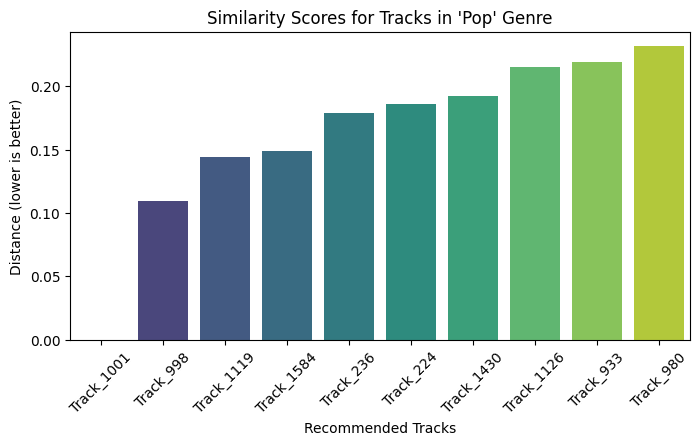

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def recommend_tracks_by_genre(genre_name, spotify_data, model, features, n_recommendations=20):

    # Filter tracks by the given genre
    genre_tracks = spotify_data[spotify_data['genre'] == genre_name]

    if genre_tracks.empty:
        print(f"No tracks found for genre: {genre_name}")
        return pd.DataFrame()

    # Select a representative track from the genre (you can modify this logic if needed)
    representative_track = genre_tracks.iloc[0]  # Or any specific track

    # Extract the features of the representative track
    track_features = representative_track[features].values.reshape(1, -1)

    # Use the model to find similar tracks
    distances, indices = model.kneighbors(track_features, n_neighbors=n_recommendations)

    # Gather recommended tracks and their similarity scores (distances)
    recommended_tracks = spotify_data.iloc[indices[0]]
    recommended_tracks['distance'] = distances[0]

    # Return the recommended tracks with their similarity scores
    recommendations = recommended_tracks[['track_name', 'artist', 'genre', 'distance']]
    return recommendations

# Example usage:
genre_name = "Pop"  # Replace with the actual genre name
recommendations = recommend_tracks_by_genre(genre_name, spotify_data, knn, features, n_recommendations=10)

# Display recommendations as a table
if not recommendations.empty:
    print(f"Recommendations for '{genre_name}' genre:")
    print(recommendations)

    # Visualize recommendation distances
    plt.figure(figsize=(8, 4))
    sns.barplot(x=recommendations['track_name'], y=recommendations['distance'], palette='viridis')
    plt.title(f"Similarity Scores for Tracks in '{genre_name}' Genre")
    plt.ylabel("Distance (lower is better)")
    plt.xlabel("Recommended Tracks")
    plt.xticks(rotation=45)
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-111-8e40837d8af1>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_tracks['distance'] = distances[0][1:]
<ipython-input-111-8e40837d8af1>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='track_name', y='distance', data=recommendations, palette='viridis')


Recommendations for tracks by 'Artist_16':
      track_name     artist  distance
813    Track_814  Artist_95  0.085001
1575  Track_1576  Artist_17  0.101318
255    Track_256  Artist_70  0.143849
981    Track_982  Artist_28  0.176947
1013  Track_1014  Artist_59  0.187065
184    Track_185  Artist_84  0.190490
522    Track_523  Artist_33  0.201282
648    Track_649  Artist_14  0.203967
601    Track_602  Artist_96  0.211626
1048  Track_1049  Artist_57  0.212618


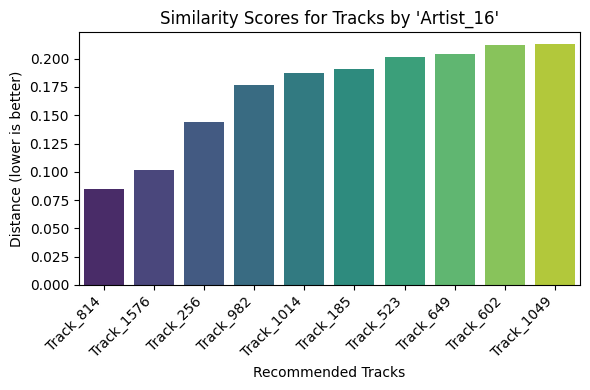

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cosine
from sklearn.metrics import accuracy_score, classification_report

# Recommendation function
def recommend_tracks_by_artist(artist_name, spotify_data, model, features, n_recommendations=20):
    # Filter tracks by the given artist
    artist_tracks = spotify_data[spotify_data['artist'] == artist_name]

    if artist_tracks.empty:
        print(f"No tracks found for artist: {artist_name}")
        return pd.DataFrame()

    # Select a representative track (first track)
    representative_track = artist_tracks.iloc[0]

    # Extract and scale the features of the representative track
    track_features = representative_track[features].values.reshape(1, -1)
    track_features_scaled = scaler.transform(track_features)

    # Find similar tracks using the k-NN model
    distances, indices = model.kneighbors(track_features_scaled, n_neighbors=n_recommendations + 1)

    # Gather recommended tracks (excluding the first one, which is the query track itself)
    recommended_tracks = spotify_data.iloc[indices[0][1:]]
    recommended_tracks['distance'] = distances[0][1:]

    # Return the recommended tracks with their similarity scores
    recommendations = recommended_tracks[['track_name', 'artist', 'distance']]
    return recommendations

# Example artist name
artist_name = "Artist_16"  # Replace with an actual artist name in your dataset

# Get recommendations
recommendations = recommend_tracks_by_artist(artist_name, spotify_data, knn_model, features, n_recommendations=10)

# Display recommendations as a table
if not recommendations.empty:
    print(f"Recommendations for tracks by '{artist_name}':")
    print(recommendations)

    # Visualize recommendation distances
    plt.figure(figsize=(6, 4))
    sns.barplot(x='track_name', y='distance', data=recommendations, palette='viridis')
    plt.title(f"Similarity Scores for Tracks by '{artist_name}'")
    plt.ylabel("Distance (lower is better)")
    plt.xlabel("Recommended Tracks")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-112-ac197e0f6479>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_tracks['distance'] = distances[0][1:]
<ipython-input-112-ac197e0f6479>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='track_name', y='distance', data=recommendations, palette='coolwarm')


Recommendations for tracks by 'Artist_16' in the genre 'Pop':
      track_name     artist      genre  distance
355    Track_356  Artist_64        R&B  0.078669
1294  Track_1295  Artist_52       Rock  0.090558
1532  Track_1533  Artist_35        Pop  0.111886
907    Track_908   Artist_4       Rock  0.156785
89      Track_90  Artist_15        Pop  0.163209
1344  Track_1345  Artist_51        Pop  0.172980
728    Track_729  Artist_99    Country  0.180095
686    Track_687  Artist_19  Classical  0.191427
1113  Track_1114  Artist_35    Hip-Hop  0.197395
877    Track_878  Artist_88    Hip-Hop  0.205349


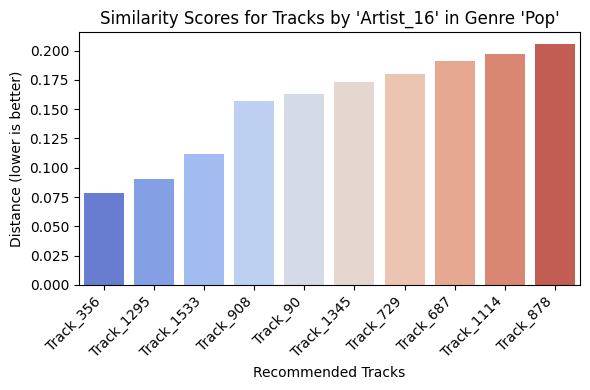

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler

# Recommendation function based on artist and genre
def recommend_tracks_by_artist_genre(artist_name, genre_name, spotify_data, model, features, n_recommendations=20):
    # Filter tracks by the given artist and genre
    filtered_tracks = spotify_data[(spotify_data['artist'] == artist_name) & (spotify_data['genre'] == genre_name)]

    if filtered_tracks.empty:
        print(f"No tracks found for artist: '{artist_name}' and genre: '{genre_name}'")
        return pd.DataFrame()

    # Select a representative track (first track)
    representative_track = filtered_tracks.iloc[0]

    # Extract and scale the features of the representative track
    track_features = representative_track[features].values.reshape(1, -1)
    track_features_scaled = scaler.transform(track_features)

    # Find similar tracks using the k-NN model
    distances, indices = model.kneighbors(track_features_scaled, n_neighbors=n_recommendations + 1)

    # Gather recommended tracks (excluding the first one, which is the query track itself)
    recommended_tracks = spotify_data.iloc[indices[0][1:]]
    recommended_tracks['distance'] = distances[0][1:]

    # Return the recommended tracks with their similarity scores
    recommendations = recommended_tracks[['track_name', 'artist', 'genre', 'distance']]
    return recommendations

# Example artist and genre
artist_name = "Artist_16"  # Replace with an actual artist name in your dataset
genre_name = "Pop"         # Replace with an actual genre in your dataset

# Get recommendations
recommendations = recommend_tracks_by_artist_genre(artist_name, genre_name, spotify_data, knn_model, features, n_recommendations=10)

# Display recommendations as a table
if not recommendations.empty:
    print(f"Recommendations for tracks by '{artist_name}' in the genre '{genre_name}':")
    print(recommendations)

    # Visualize recommendation distances
    plt.figure(figsize=(6,4))
    sns.barplot(x='track_name', y='distance', data=recommendations, palette='coolwarm')
    plt.title(f"Similarity Scores for Tracks by '{artist_name}' in Genre '{genre_name}'")
    plt.ylabel("Distance (lower is better)")
    plt.xlabel("Recommended Tracks")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [ ]:
from google.colab import files
files.download('knn.pkl')
